Graph-based SLAM
Credit to Cyrill Stachniss's online course

In this experiment,we look into the applications of pose graph optimizations in the SLAM problem. And how we can use numerical linear algebra to improve the efficiency of pose graph optimization. We are using the following the datasets. Each dataset is saved in g2o format, which contains a graph including robot's pose and landmarks.
1. `simulation-pose-pose.g2o`: simulated measurements containing pose-pose constraints only  
2. `simulation-pose-landmark.g2o`: simulated measurements containing both pose-pose and pose-landmark constraints
3. `intel.g2o`: real world measurements containing pose-pose constraints only
4. `dlr.g2o`: real world measurements containing both pose-pose and pose-landmark constraints


The original least square error for each dataset without pose graph optimization


In [1]:
import graph as ex
%matplotlib inline
filename = 'data/simulation-pose-landmark.g2o'
graph = ex.read_graph_g2o(filename)
Fx=ex.compute_global_error(graph)
print("The error of this dataset is:"+str(Fx))
filename = 'data/dlr.g2o'
graph = ex.read_graph_g2o(filename)
Fx=ex.compute_global_error(graph)
print("The error of this dataset is:"+str(Fx))
filename = 'data/intel.g2o'
graph = ex.read_graph_g2o(filename)
Fx=ex.compute_global_error(graph)
print("The error of this dataset is:"+str(Fx))
filename = 'data/simulation-pose-pose.g2o'
graph = ex.read_graph_g2o(filename)
Fx=ex.compute_global_error(graph)
print("The error of this dataset is:"+str(Fx))

Loaded graph with 77 nodes and 297 edges
The error of this dataset is:[[3030.31322783]]
Loaded graph with 3873 nodes and 17605 edges
The error of this dataset is:[[3.6965533e+08]]
Loaded graph with 1728 nodes and 4830 edges
The error of this dataset is:[[1795139.0275212]]
Loaded graph with 400 nodes and 1773 edges
The error of this dataset is:[[1.38862241e+08]]


Now, we apply the pose graph optimization to the DLR graph. We can see that the square error is reduced in each iteration until convergence. The time cost and global error for each iteration is also printed.

Loaded graph with 3873 nodes and 17605 edges
The original global square error is [[3.6965533e+08]]
linearize and build system
Time Cost: 6.30424


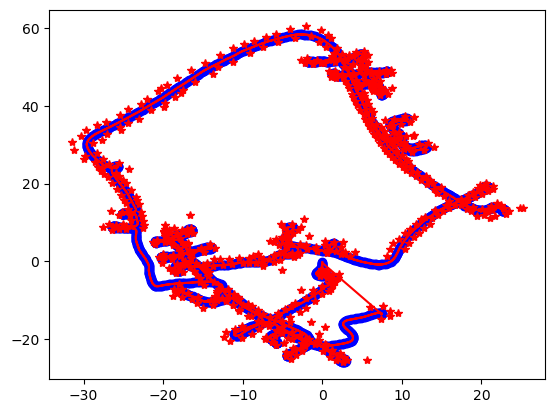

The global square error is [[64301543.67602379]]
linearize and build system
Time Cost: 6.288961800000003


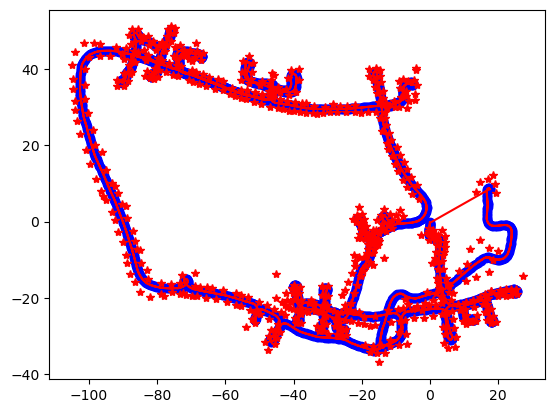

The global square error is [[1.75399075e+08]]
linearize and build system
Time Cost: 5.579986699999999


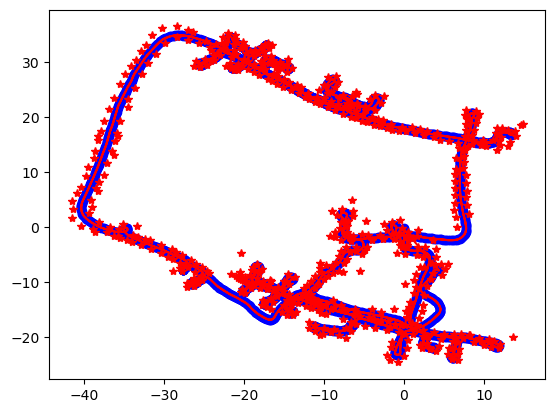

The global square error is [[30616931.98306514]]
linearize and build system
Time Cost: 5.631676599999999


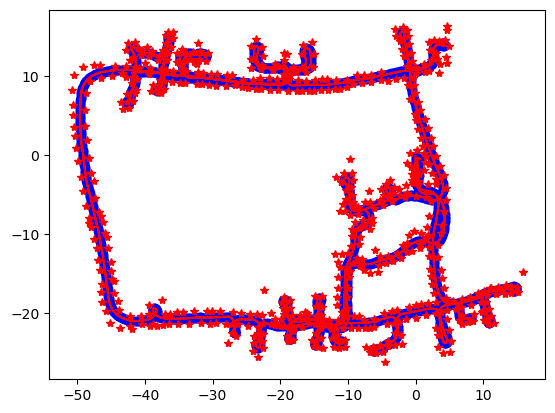

The global square error is [[444687.60391194]]
linearize and build system
Time Cost: 5.845658299999997


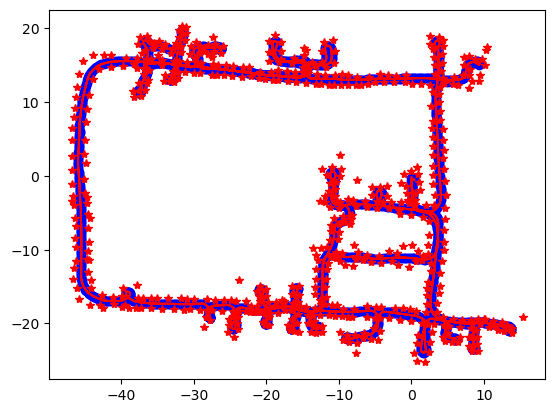

The global square error is [[113607.83085895]]
linearize and build system
Time Cost: 5.584675799999999


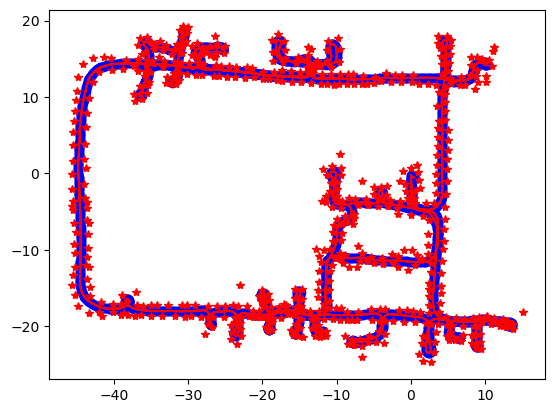

The global square error is [[57041.90395517]]
linearize and build system
Time Cost: 5.576612299999994


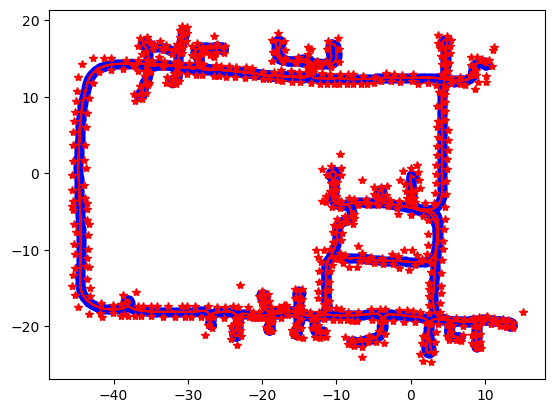

The global square error is [[56860.43743789]]
linearize and build system
Time Cost: 5.788524999999993


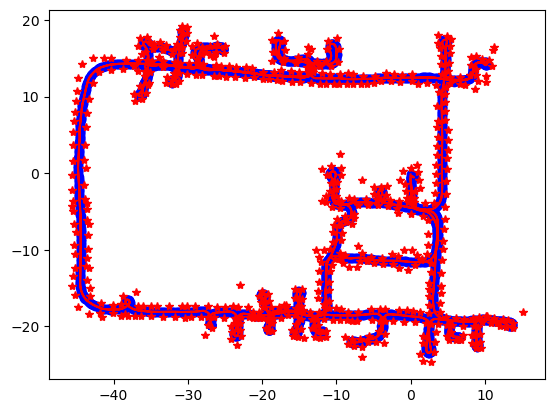

The global square error is [[56860.35400157]]
linearize and build system
Time Cost: 5.666005200000001


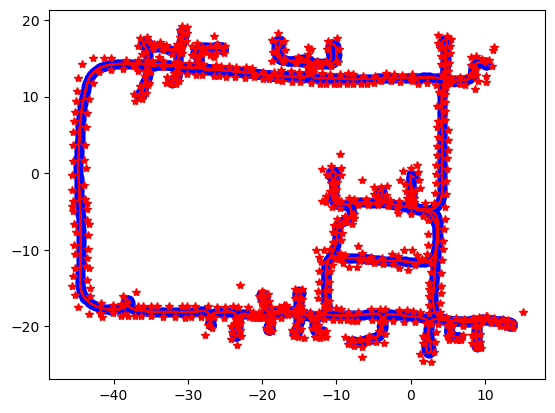

The global square error is [[56860.35265624]]
linearize and build system
Time Cost: 5.82484980000001


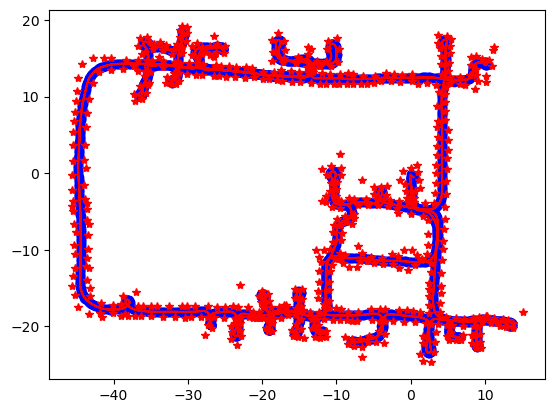

The global square error is [[56860.35259304]]


In [2]:
filename = 'data/dlr.g2o'
g = ex.read_graph_g2o(filename)
ex.run_graph_slam(g,100)

For each iteration in the pose graph optimization problem, the systems needs to solve a linear system problem. In slam, the size of the matrix will be very larger therefore it will take a lot of time to solve the equation. However, the matrix is also sparse, which means that we can apply numerical algebra approach to utilize this property to make the algorithm more efficient. The library that we use is the scipy.sparse.linalg library. From the results shown below, we can see that the time cost for each iteration is reduced a lot.

Loaded graph with 3873 nodes and 17605 edges
The original global square error is [[3.6965533e+08]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 1.118919399999868


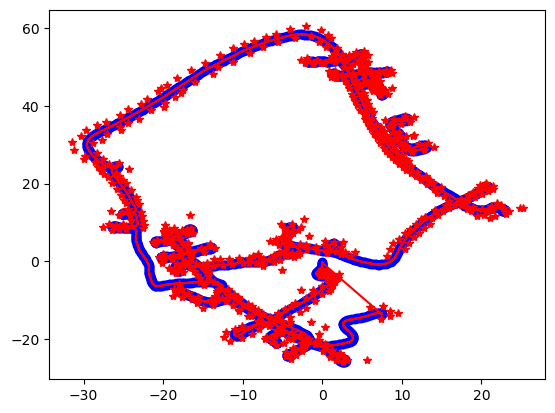

The global square error is [[64301543.96621111]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 1.009293400000388


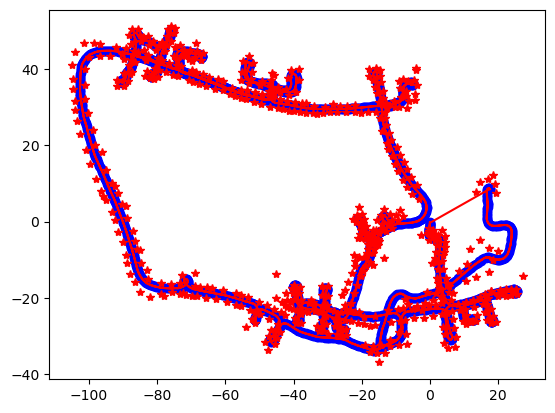

The global square error is [[1.75399069e+08]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 1.0652219999992667


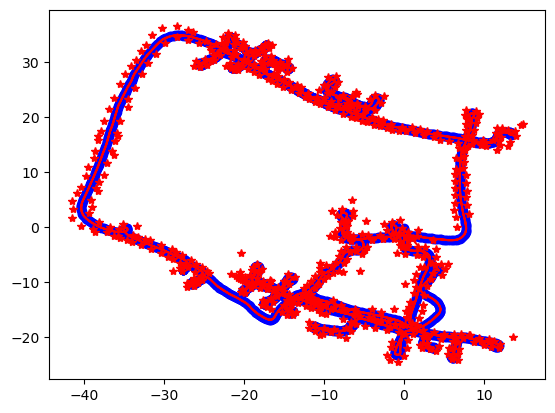

The global square error is [[30616931.07159955]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 1.0028027999996993


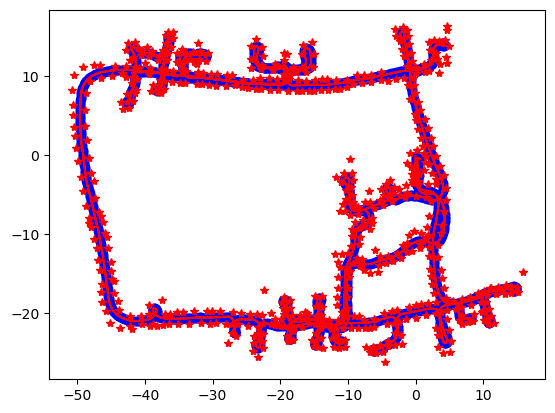

The global square error is [[444687.62447507]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 0.9960491000001639


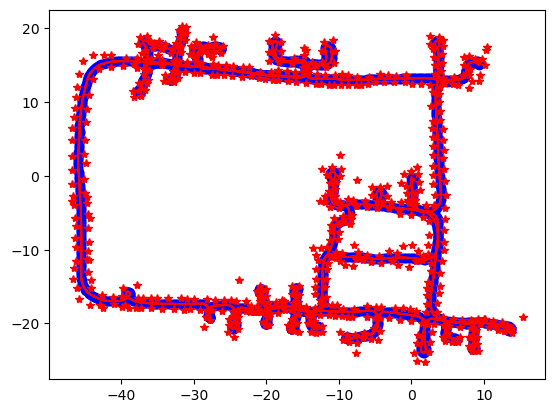

The global square error is [[113607.82873326]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 0.9775686000011774


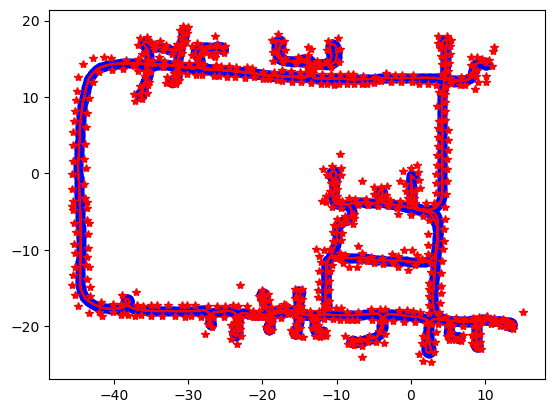

The global square error is [[57041.90395156]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 0.9750939000005019


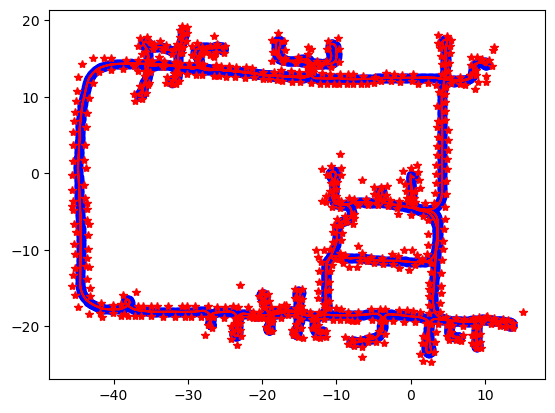

The global square error is [[56860.43743789]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 0.9718714000009641


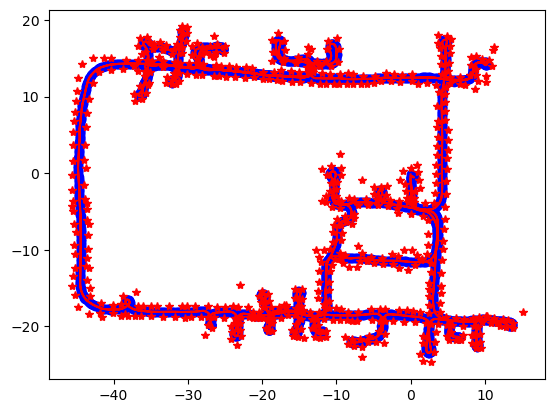

The global square error is [[56860.35400157]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 0.9891272000004392


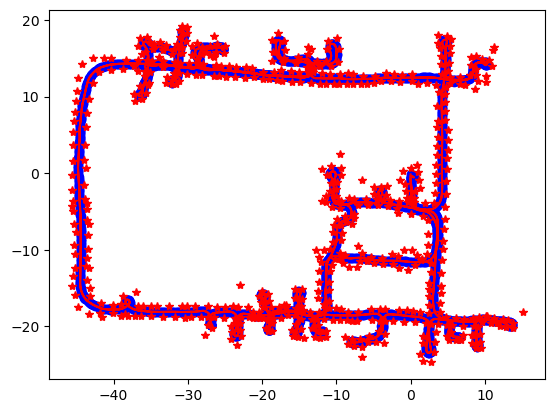

The global square error is [[56860.35265624]]
linearize and build system


C:\anaconda3\envs\DSC210_SLAM\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time Cost: 1.002802499999234


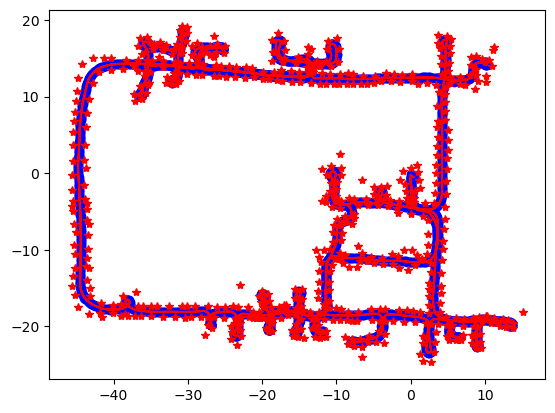

The global square error is [[56860.35259304]]


In [2]:
filename = 'data/dlr.g2o'
g = ex.read_graph_g2o(filename)
ex.run_graph_slam_sparse(g,100)

Feel free to try our algorithms in other datasets!